In [97]:
import tifffile
import os
import math
import cv2
import numpy as np
import ComputeGaussianPSF as CG

import matplotlib.pyplot as plt

In [98]:
filepath = '/home/imaging/Documents/MATLAB_SIM/OTF_SIMULATION/single point/7phase single point 3phase 144nm 26p5nm scaled/angle0/'
filename = 'single_centered_point_488nm_point_7_phase_26p5nm_plane1_angle0.tif'



In [99]:
mfm_planes = 9
phases = 7
for kk in range(9):
    string_length = len(filename)
    current_filename = filename[0:-12] + str(kk + 1) + filename[string_length - 11:]
    print(current_filename)
    my_im = tifffile.imread(filepath + current_filename)

    print(my_im.shape)
    dims = my_im.shape
    print(dims[0])
    print(dims[1])
    print(dims[2])
    
    a = (np.zeros((dims[0]//phases,dims[1], dims[2]))).astype(my_im.dtype)
    #print(a.shape)
    phase = 0
    # for i in range(15):
    #     for j in range(4):
    #         a[i + j*15,:,:] = my_im[i + j*15,:,:]

    mode = 0o777

    while(phase < phases):
        outFolder = filepath + 'phase' + str(phase) + '/'
        # outfile = outFolder +filename[0:lend(filename) - 4] + 'phase' + str(phase) + '.tif'
        if(os.path.exists(outFolder) == False):
            os.mkdir(outFolder, mode)
        for i in range(dims[0]//phases):
            a[i,:,:] = my_im[i*phases + phase,:,:]

        
        tifffile.imwrite(outFolder + current_filename[0:len(current_filename) - 4] + '_phase_' + str(phase) + '.tif', a)
        phase += 1


    # plt.imshow(a[2,0,1]) 
    #outpath = '/run/media/imaging/Elmo_Pro/SIM_Data/2022_June_SIM_data/Max_SIM_rig/220621_psf/bead_100nm_16p6aotf_65nmstep_4umrange_3dsim_1/'
    # with tifffile.TiffWriter('temp.tif') as tif:
    #   for i in range(4):
    #     filename = f"image_{i}"
    #     img = np.random.randint(0, 1023, (256, 256), 'float32')
    #     tif.save(img, photometric='minisblack', description=filename)



single_centered_point_488nm_point_7_phase_26p5nm_plane1_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane2_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane3_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane4_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane5_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane6_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane7_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane8_angle0.tif
(7, 513, 513)
7
513
513
single_centered_point_488nm_point_7_phase_26p5nm_plane9_angle0.tif
(7, 513, 513)
7
513
513


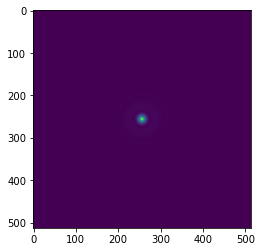

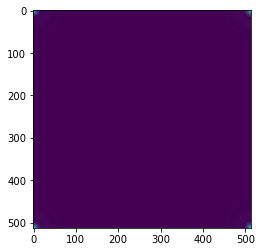

In [100]:
im_fft = np.fft.fft2(my_im[0,:,:])
im_fft_shft = np.fft.fftshift(im_fft)
# im_fft = np.fft.fftshift(my_im)
plt.imshow(np.abs(im_fft_shft))
plt.figure(2)
plt.imshow(np.abs(im_fft))